<a href="https://colab.research.google.com/github/mldurga/projects/blob/master/wagon_shipment_reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install paddlepaddle paddleocr

In [5]:
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image
# import gradio as gr
import torch

In [37]:
 ocr = PaddleOCR(use_angle_cls=True, lang='en',use_gpu=False)
 img_path='/content/IMG-20211130-WA0049.jpg'
 result = ocr.ocr(img_path, cls=True)

[2021/12/14 13:04:21] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2021/12/14 13:04:21] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2021/12/14 13:04:21] root WARNING: version PP-OCRv2 not support cls models, auto switch to version PP-OCR
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/2.3.0.2/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/2.3.0.2/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='box', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_t

In [43]:
 img_path='/content/IMG-20211130-WA0049.jpg'
 result = ocr.ocr(img_path, cls=True)

[2021/12/14 13:04:51] root DEBUG: dt_boxes num : 6, elapse : 0.4762451648712158
[2021/12/14 13:04:51] root DEBUG: cls num  : 6, elapse : 0.0779731273651123
[2021/12/14 13:04:51] root DEBUG: rec_res num  : 6, elapse : 0.27066922187805176


In [44]:
result

[[[[88.0, 157.0], [232.0, 161.0], [231.0, 219.0], [86.0, 215.0]],
  ('SWR', 0.9963341)],
 [[[516.0, 155.0], [653.0, 152.0], [654.0, 180.0], [516.0, 183.0]],
  ('BUSIHSMII', 0.883713)],
 [[[438.0, 184.0], [718.0, 188.0], [717.0, 233.0], [437.0, 229.0]],
  ('2115064516', 0.98593444)],
 [[[507.0, 490.0], [555.0, 490.0], [555.0, 516.0], [507.0, 516.0]],
  ('78', 0.6682836)]]

In [45]:
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]


In [46]:
im_show = draw_ocr(image, boxes, txts, scores,font_path='/content/simfang.ttf')
im_show = Image.fromarray(im_show)

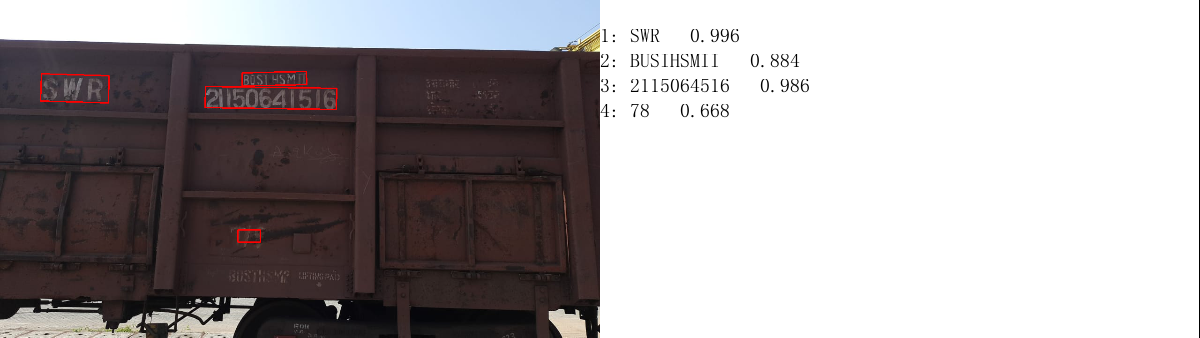

In [47]:
im_show

In [48]:
import pandas as pd

In [51]:
Rail_region=pd.read_excel('/content/Book1 (1).xlsx')

In [52]:
Rail_region

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,S.no,Railway owning zone,NaN,S.no,Wagon types,Remarks
5,NaN,NaN,NaN,1,CR,NaN,1,BOST,Steel wagon
6,NaN,NaN,NaN,2,KR,NaN,2,BRN,Steel wagon
7,NaN,NaN,NaN,3,NR,NaN,3,BRNA,Steel wagon
8,NaN,NaN,NaN,4,NCR,NaN,4,BRNAHS,Steel wagon
9,NaN,NaN,NaN,5,NER,NaN,5,BFNS,Steel wagon


In [69]:
Rail_region.iloc[5:,4:5].values.flatten()

array(['CR', 'KR', 'NR', 'NCR', 'NER', 'NFR', 'NWR', 'ER', 'ECR', 'ECoR',
       'SR', 'SCR', 'SCoR', 'SER', 'SECR', 'SWR', 'WR', 'WCR'],
      dtype=object)

In [72]:
dict(Rail_region.iloc[5:15,7:9].values)

{'BFNS': 'Steel wagon',
 'BOST': 'Steel wagon',
 'BOSTHS': 'Steel wagon',
 'BOXN': 'Steel wagon',
 'BRN': 'Steel wagon',
 'BRNA': 'Steel wagon',
 'BRNAHS': 'Steel wagon',
 'BVCM': 'Brake van',
 'BVZC': 'Brake van',
 'BVZI': 'Brake van'}